<a href="https://colab.research.google.com/github/Monika-Monik/AllProjects-/blob/main/BusinessCase_Jamboree_Education_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BUSINESS CASE

**Jamboree** is India's leading institute for study abroad test prep and admission counselling. With the highest scores for GMAT and GRE in the industry and admission offers from the best universities worldwide, Jamboree has helped thousands of students get into their dream universities.

**GOAL:**Predict one's chances of admission by
analysing factors important in graduate admissions and how those factors are interrelated among themselves.

In [ ]:
#Importing the basic librarires

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
plt.rcParams['figure.figsize'] = [15,7]

import warnings 
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [ ]:
# Read raw data from the file
df=pd.read_csv("/content/Jamboree_Admission.csv")
df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [ ]:
#Size of dataframe
print("Size of dataset: ",df.shape)

# We can see that there are 500 instances having 9 attributes

#Drop the first column 'Serial No.' since it just has serial numbers. Not useful in the prediction process.
df = df.iloc[:,1:]
print("Size of revised dataset",df.shape)

#Rename Columns
df.rename(columns ={'GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score','University Rating':'University_Rating','LOR ':'LOR'},inplace=True)
df.rename(columns ={'Chance of Admit ':'Chance_of_Admit'},inplace=True)
df.columns

Size of dataset:  (500, 9)
Size of revised dataset (500, 8)


Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [ ]:
target = 'Chance_of_Admit'
features = [i for i in df.columns if i not in [target]]
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))


Inference: The Datset consists of 8 features & 500 samples.


In [ ]:
# Statistical description
print(df.describe())


        GRE_Score  TOEFL_Score  University_Rating         SOP        LOR  \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance_of_Admit  
count  500.000000  500.000000        500.00000  
mean     8.576440    0.560000          0.72174  
std      0.604813    0.496884          0.14114  
min      6.800000    0.000000          0.34000  
25%      8.127500    0.000000          0.63000  
50%      8.560000    

**Inference:** There is no missing value in each column as the count is 500 for each column.

*   GRE Score ranges from 290 to 340
*   TOEFL Score,min is 92 and max is 120
*   University Rating/SOP/LOR is from 1 to 5.
*   CGPA is in [1,10]
*   Research is 0,1
*   Chance of Admit-0.34,0.97 etc

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          500 non-null    int64  
 1   TOEFL_Score        500 non-null    int64  
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
# Skewness of the distribution

print(df.skew())

GRE_Score           -0.039842
TOEFL_Score          0.095601
University_Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance_of_Admit     -0.289966
dtype: float64


**Inference**:
Values close to 0 show less skew

TOEFL_Score shows the highest skew.

In [ ]:
df.value_counts()

GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  Research  Chance_of_Admit
290        100          1                  1.5  2.0  7.56  0         0.47               1
322        110          4                  4.0  5.0  9.13  1         0.86               1
323        110          3                  4.0  3.5  9.10  1         0.79               1
           108          5                  4.0  4.0  8.74  1         0.81               1
                        3                  3.5  3.0  8.60  0         0.45               1
                                                                                       ..
311        105          2                  3.0  2.0  8.12  1         0.73               1
           104          3                  4.5  4.5  8.43  0         0.70               1
                                           4.0  3.5  8.13  1         0.74               1
                                           3.5  2.0  8.20  1         0.61               1
340        120 

In [ ]:
df.nunique()

GRE_Score             49
TOEFL_Score           29
University_Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance_of_Admit       61
dtype: int64

# Correlation

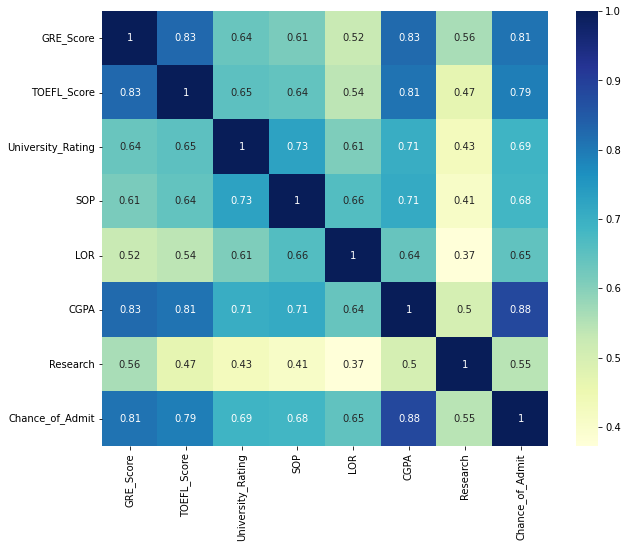

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

**Inference:**
We can see the following correlation.

* Chance of Admit and CGPA
* Chance of Admit and GRE_Score
* Chance of Admit and TOEFL_Score

Another visualisation we can check, is the scatter plot of each feature with the target. This can be easily done using pairplot from seaborn library

<Figure size 864x720 with 0 Axes>

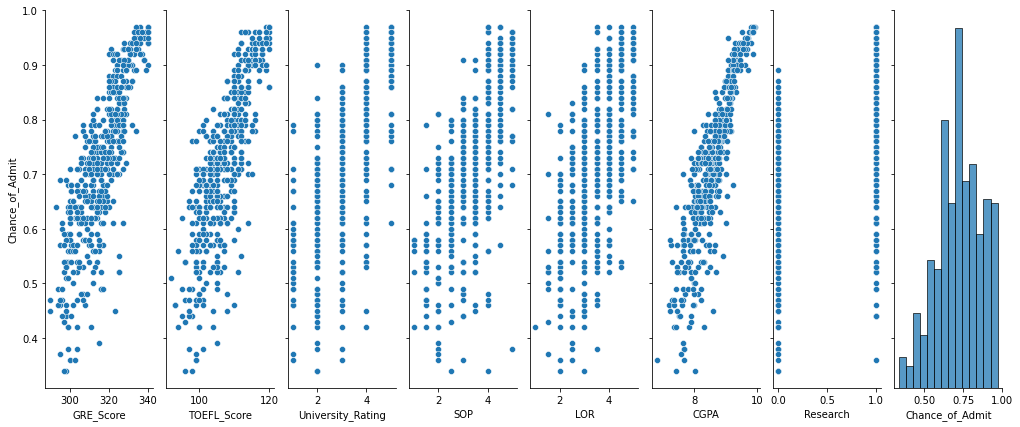

In [ ]:
plt.figure(figsize=(12,10))
ax=sns.pairplot(df,y_vars=['Chance_of_Admit'], size=6, aspect=0.3)
plt.show()

**Inference:**
GRE_Score, TOEFL_Score,CGPA are increasing woth increase of chance of Admission.

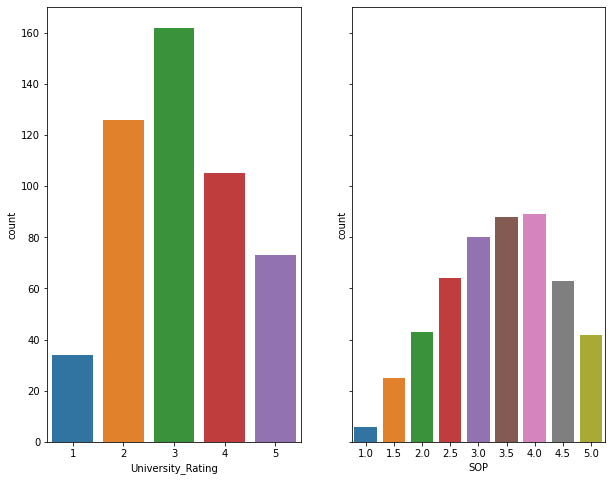

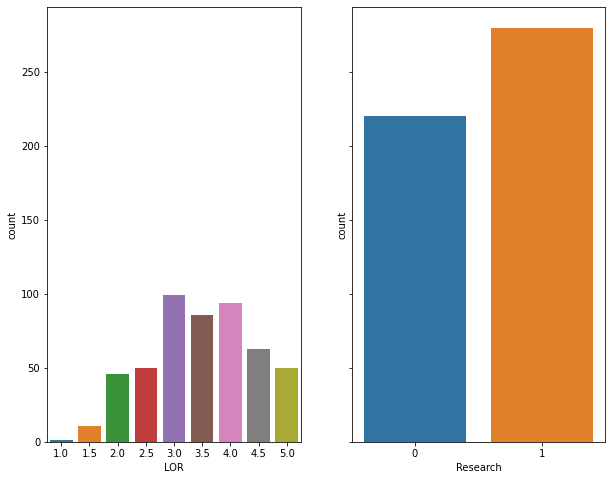

In [ ]:
# Count of each label in each category

#names of all the columns
cols = ['University_Rating','SOP','LOR','Research']
#Plot count plot for all attributes in a 29x4 grid
n_cols = 2
n_rows = 2
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(10, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=df, ax=ax[j])

**Inference**:
University Rating with rating 3 having more admission applications.

Statement of Purpose lies maximum between and 3.5 and 4.0.

Letter of Recommendation Strength having maximum with 3 rating.

Lots of applicants are having research experience.

#Outlier treatment

Lower_bound : 282.5
Upper_bound : 333.5
GRE_Score_outlier:  [334, 335, 336, 337, 338, 339, 340]
GRE_Score_outlier_percentage:  7.000000000000001




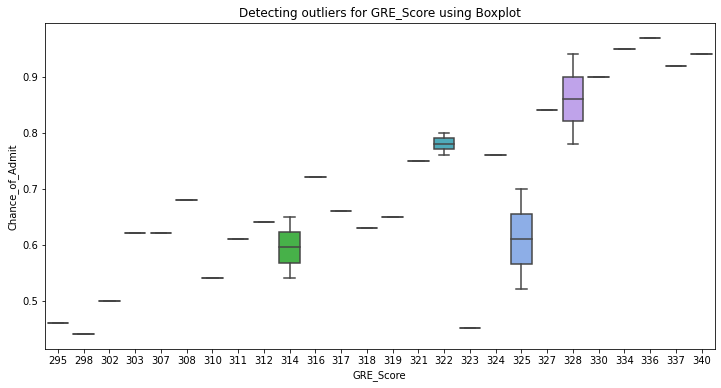

Lower_bound : 89.5
Upper_bound : 116.5
TOEFL_Score_outlier:  [120, 117, 118, 119]
TOEFL_Score_outlier_percentage:  7.3999999999999995




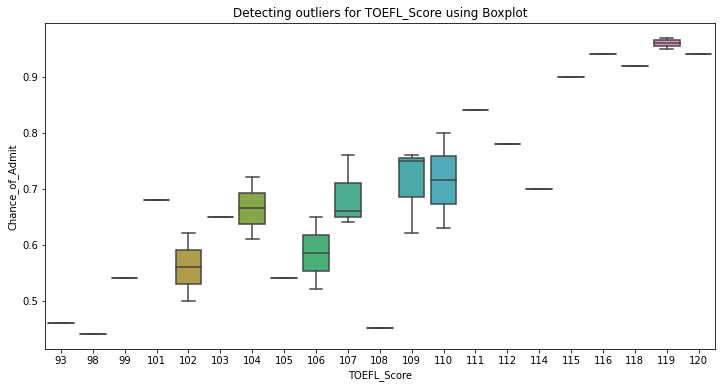

Lower_bound : -1.0
Upper_bound : 5.0
University_Rating_outlier:  []
University_Rating_outlier_percentage:  0.0




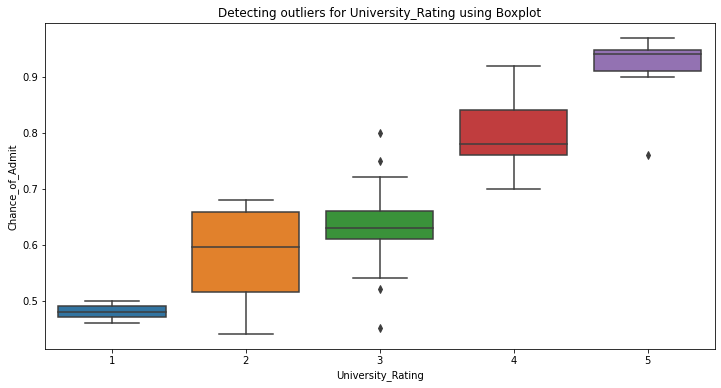

Lower_bound : 0.25
Upper_bound : 4.75
SOP_outlier:  [5.0]
SOP_outlier_percentage:  8.4




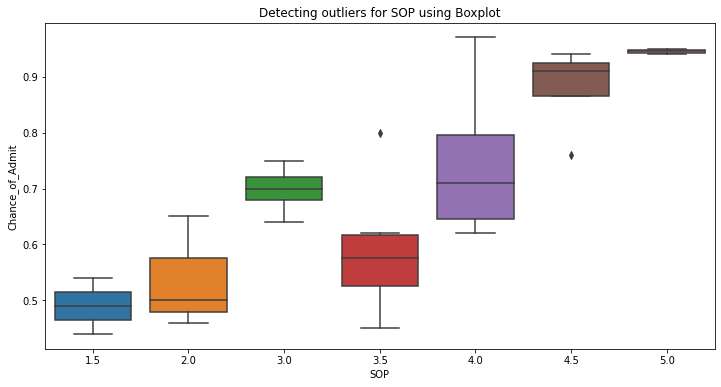

Lower_bound : 1.5
Upper_bound : 4.5
LOR_outlier:  [1.0, 5.0]
LOR_outlier_percentage:  10.2




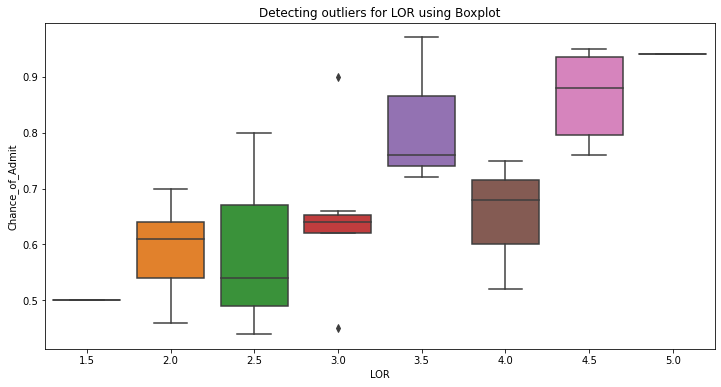

Lower_bound : 6.7587500000000045
Upper_bound : 9.496249999999998
CGPA_outlier:  [9.82, 9.65, 9.6, 9.8, 9.5, 9.7, 9.64, 9.76, 9.56, 9.92, 9.53, 9.91, 9.87, 9.66, 9.78, 9.68, 9.54, 9.74, 9.62, 9.86, 9.67]
CGPA_outlier_percentage:  6.6000000000000005




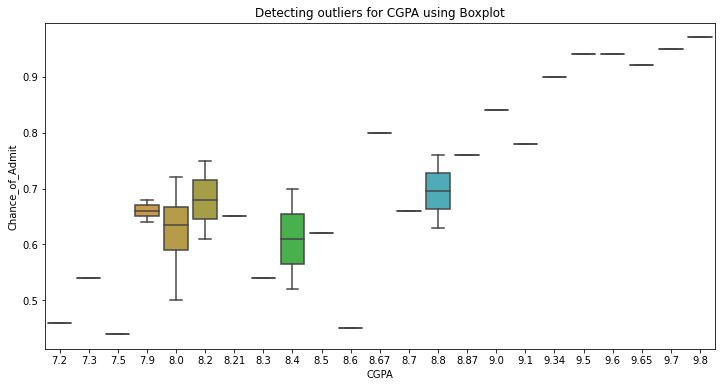

Lower_bound : -1.5
Upper_bound : 1.5
Research_outlier:  []
Research_outlier_percentage:  0.0




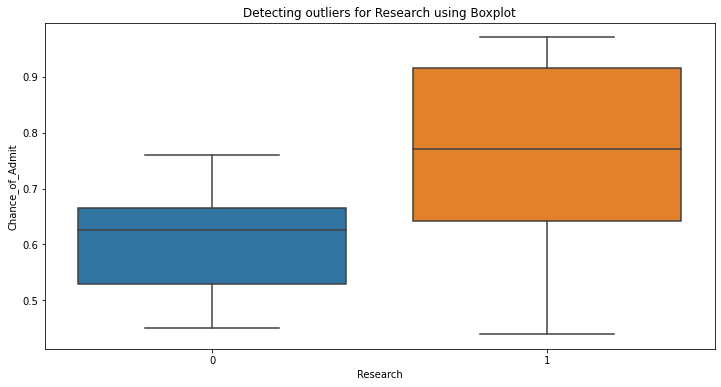

In [ ]:
from scipy.stats.stats import iqr
df1=df.copy()
lst=['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP','LOR', 'CGPA', 'Research']
for l in lst:
  q1=df[l].quantile(0.25)
  q3=df[l].quantile(0.75)
  iqr =q3-q1
  print("Lower_bound :",q1-(1.5*iqr))
  print("Upper_bound :",q1+(1.5*iqr))
  outlier = [l for l in df[l] if (l <(q1-(1.5*iqr))) | (l >(q1+(1.5*iqr)))]
  outlier_per=(len(outlier)/len(df)) *100
  print(l+"_outlier: ",list(set(outlier)))
  print(l+"_outlier_percentage: ",outlier_per)


  print('\n')
  plt.figure(figsize=(12,6))
  #plt.boxplot(df[l].sample(50))
  sns.boxplot(y='Chance_of_Admit',x=l, data=df.head(30))
  ttl="Detecting outliers for "+l+" using Boxplot"
  plt.title(ttl)
  plt.show()

**Inference**: As outliers are not that much ,we can ignore them.

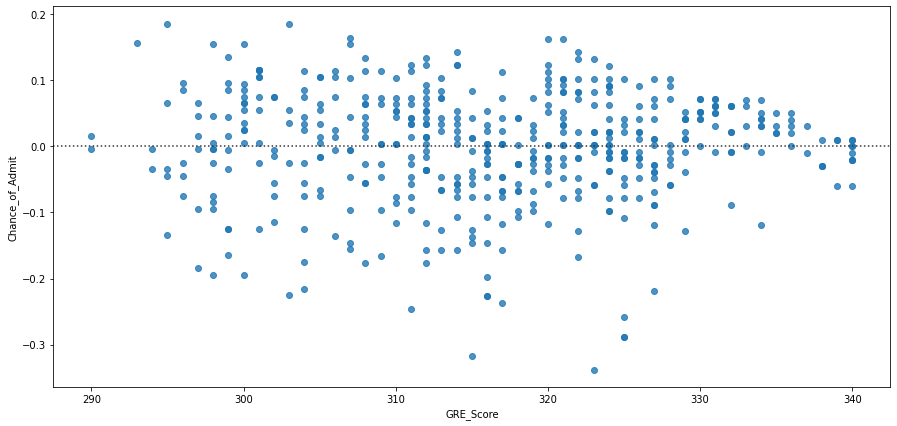

In [ ]:
sns.residplot(x='GRE_Score', y='Chance_of_Admit', data=df)

#**Splitting the data intro training & testing sets**

In [ ]:
m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df[df.columns.drop('Chance_of_Admit')]
Y = df["Chance_of_Admit"] 
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  : ',X.shape,Y.shape,'\nTraining set  : ',Train_X.shape,Train_Y.shape,'\nTesting set  : ', Test_X.shape,'', Test_Y.shape)

Original set  :  (500, 7) (500,) 
Training set  :  (400, 7) (400,) 
Testing set  :  (100, 7)  (100,)


#**Feature Scaling (Standardization)**

In [ ]:
std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,-1.585398e-15,-1.135758e-15,-4.773959e-17,-1.953993e-16,9.103829e-17,1.909584e-16,-5.329071e-17
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-2.291685e+00,-2.468175e+00,-1.828788e+00,-2.414224e+00,-2.691066e+00,-2.978048e+00,-1.099975e+00
25%,-7.115154e-01,-8.219018e-01,-9.495629e-01,-8.699444e-01,-5.054286e-01,-7.284176e-01,-1.099975e+00
50%,-9.217658e-03,1.234705e-03,-7.033799e-02,1.595756e-01,4.098070e-02,-1.778679e-02,9.091117e-01
75%,6.930801e-01,8.243712e-01,8.088869e-01,6.743356e-01,5.873900e-01,7.559178e-01,9.091117e-01
max,2.097676e+00,2.141390e+00,1.688112e+00,1.703856e+00,1.680209e+00,2.269688e+00,9.091117e-01



                                          Standardardization on Testing set                                          


,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.161090,0.164216,0.149468,0.149280,0.117478,0.049324,0.125568
std,0.945729,0.995355,1.018122,1.090082,1.050666,1.083366,0.984869
min,-1.852749,-1.809666,-1.828788,-2.414224,-2.144657,-2.170704,-1.099975
25%,-0.535941,-0.657275,-0.949563,-0.483874,-0.505429,-0.795696,-1.099975
50%,0.254144,0.001235,-0.070338,0.159576,0.040981,0.142000,0.909112
75%,0.868655,0.824371,0.808887,0.803026,0.723992,0.911500,0.909112
max,2.097676,2.141390,1.688112,1.703856,1.680209,2.185589,0.909112


# **Model building**

In [ ]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()

API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     250.3
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          2.27e-140
Time:                        17:04:08   Log-Likelihood:                 556.28
No. Observations:                 400   AIC:                            -1097.
Df Residuals:                     392   BIC:                            -1065.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7160      0.003    235.381      0.000       0.710       0.722
GRE_Score             0.0174      0.007      2.626      0.009       0.004       0.030
TOEFL_Score           0.0189      0.006      3.148      0.002       0.007       0.031
University_Rating     0.0057      0.005      1.164      0.245      -0.004       0.015
SOP                  -0.0010      0.005     -0.195      0.845      -0.011       0.009
LOR                   0.0176      0.004      4.081      0.000       0.009       0.026
CGPA                  0.0733      0.007     10.993      0.000       0.060       0.086
Research              0.0133      0.004      3.587      0.000       0.006       0.021
==============================================================================
Omnibus:                       89.475   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.788
Skew:                          -1.139   Prob(JB):                     2.51e-44
Kurtosis:                       5.618   Cond. No.                         5.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Coeffecient of model
print("\033[1m  Coeffecient of  linear rigression model".center(100))
coeffecients = API.params
coeffecients.head()

                             Coeffecient of  linear rigression model                            


Intercept            0.716000
GRE_Score            0.017437
TOEFL_Score          0.018883
University_Rating    0.005670
SOP                 -0.000988
dtype: float64

In [ ]:
print('\033[1mConfidence Interval linear rigression model'.center(100))
print(API.conf_int())
print('\033[1mp-Values'.center(100))
print(API.pvalues)

                          Confidence Interval linear rigression model                           
                          0         1
Intercept          0.710020  0.721980
GRE_Score          0.004381  0.030492
TOEFL_Score        0.007088  0.030677
University_Rating -0.003905  0.015246
SOP               -0.010936  0.008961
LOR                0.009138  0.026128
CGPA               0.060228  0.086462
Research           0.006034  0.020666
                                            p-Values                                            
Intercept            0.000000e+00
GRE_Score            8.984668e-03
TOEFL_Score          1.772222e-03
University_Rating    2.450334e-01
SOP                  8.453556e-01
LOR                  5.441188e-05
CGPA                 1.099475e-24
Research             3.761648e-04
dtype: float64


#Multicollinearity
- When one or more input variables exhibit strong correlation
- One variable is enough to be part of the model.

A rule of thumb for interpreting the variance inflation factor:


* 1 = not correlated.
* Between 1 and 5 = moderately correlated.
* Greater than 5 = highly correlated.

In [ ]:
DROP=[];b=[]

for i in range(len(Train_X_std.columns)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
print('\033[1mVariance Inflation Factor'.center(100))
print(vif)

                                   Variance Inflation Factor                                    
            Features   VIF
0               CGPA  4.81
1          GRE_Score  4.77
2        TOEFL_Score  3.89
3                SOP  2.77
4  University_Rating  2.56
5                LOR  2.02
6           Research  1.50


#### Note : VIF values tends to be infinity when there is a perfect correlation between the variables

**Inference:**TOEFL_Score & GRE_Score are moderately correlated with other

#**Testing the assumptions of the linear regression model**

**Residual_Mean**

In [ ]:
residuals_mean = np.mean(API.resid)
print("Residuals mean of Linear Rigression:",residuals_mean)

Residuals mean of Linear Rigression: -3.838596107641479e-16


**Linearity of variables**

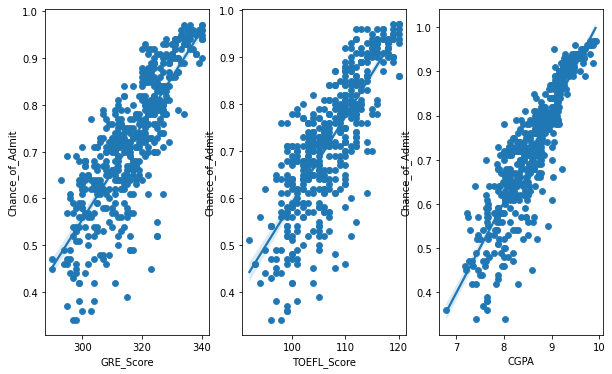

In [ ]:
## Plot sizing. 
fig, (ax1, ax2,ax3) = plt.subplots(figsize = (10,6), ncols=3,sharey=False)
## Scatter plotting for SalePrice and GrLivArea. 
sns.scatterplot( x = df['GRE_Score'], y = df['Chance_of_Admit'],  ax=ax1)
## Putting a regression line. 
sns.regplot(x=df['GRE_Score'], y=df['Chance_of_Admit'], ax=ax1)

## Scatter plotting for SalePrice and GrLivArea. 
sns.scatterplot( x = df['TOEFL_Score'], y = df['Chance_of_Admit'],  ax=ax2)
## Putting a regression line. 
sns.regplot(x=df['TOEFL_Score'], y=df['Chance_of_Admit'], ax=ax2)

## Scatter plotting for SalePrice and MasVnrArea. 
sns.scatterplot(x = df['CGPA'],y = df['Chance_of_Admit'], ax=ax3)
## regression line for MasVnrArea and SalePrice. 
sns.regplot(x = df['CGPA'],y = df['Chance_of_Admit'], ax=ax3)

**Inference:**
Here plotting our target variable with three independent variables GRE_Score,TOEFL_Score and CGPA. It's pretty apparent from the chart that there is a better linear relationship between Chance of Admit and CGPA than rest two. One thing to take note here, there are some outliers in the dataset. 

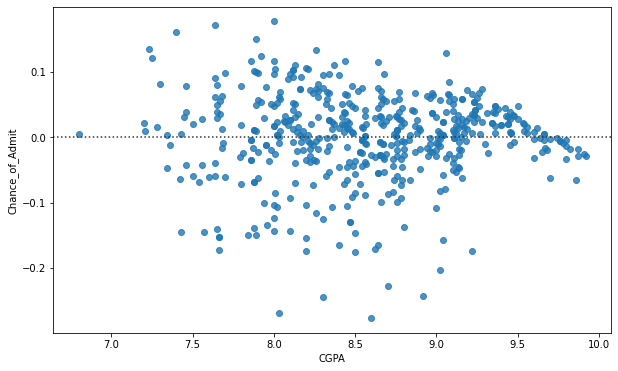

In [ ]:
plt.subplots(figsize=(10,6))
sns.residplot(df['CGPA'],df['Chance_of_Admit'])

**Inference:**There is no pattern but as per the plot,CGPA increases then variance decreases 

**Homoscedasticity Test**

Homoscedasticity refers to the variability of the dependent variable being equal across the independent variable values. We can check this assumption by creating a scatterplot of the model predictions and residuals, we’re looking for the residuals to equal across the regression line. We could also use a significance test such as the Breusch-Pagan test.

Text(0.5, 1.0, 'Residual Plot')

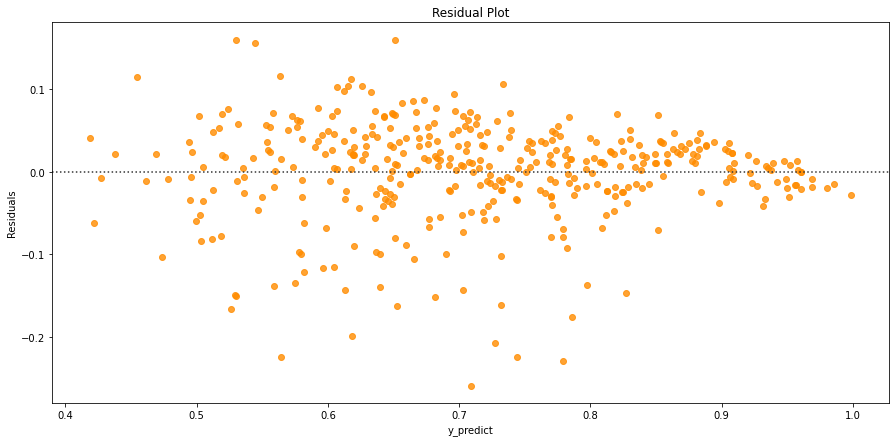

In [ ]:
#Calculating y_predict and residuals
y_predict=API.predict(Train_X_std)
residual=API.resid

sns.residplot(y_predict,residual,color='darkorange')
plt.xlabel("y_predict")
plt.ylabel("Residuals")
plt.title("Residual Plot")

**Inference:**
At the plot above, we can see the values do not look to be forming a pattern on the left side but are forming a pattern on the right side. This plot shows that the error descreases with the predicted values, so it is homoscedastic.

**Breusch-Pagan test**
A Breusch-Pagan test uses the following null and alternative hypotheses:

The null hypothesis (H0): Homoscedasticity is present.

The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)

In [ ]:
#Breusch-Pagan test

from statsmodels.compat import lzip
import statsmodels.stats.api as sms

names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(API.resid, API.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 22.297030794767725),
 ('p-value', 0.0022574547011399437),
 ('f-value', 3.305861553416919),
 ('f p-value', 0.0019797363300155324)]

**Inference:**
The p-value is not less than 0.05, we are fail to reject the null hypothesis. We have not sufficient evidence to say that heteroscedasticity is present in the regression.

**Normality of residuals**

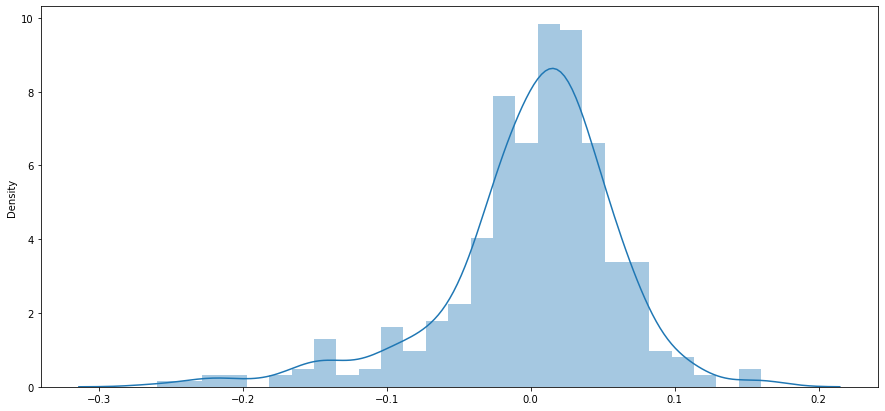

In [ ]:
sns.distplot(API.resid)

**Inference:**Almost bell-shaped curve in residuals distribution 

**Q-Q plot**

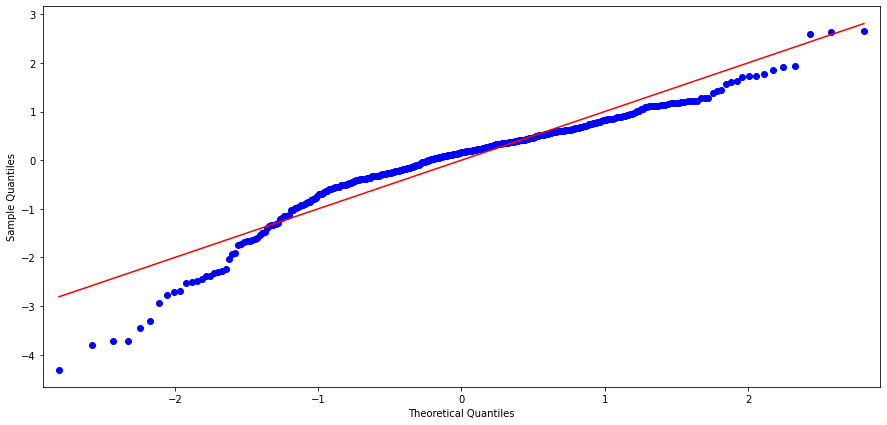

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
sm.qqplot(API.resid, line='s',fit=True)
plt.show()

**Inference:**
Maximum points are farther away from red line.But we can say that few points in QQ plot are on the line.

# Model performance evaluation
Metrics checked - MAE, RMSE, R2, Adj R2
Train and test performances check

In [ ]:
print(df.shape)
print(Train_X.shape)
print(Test_X.shape)

(500, 8)
(400, 7)
(100, 7)


In [ ]:
print(Train_Y.shape)
print(Test_Y.shape)

(400,)
(100,)


In [ ]:
# predit value
y_pred = API.predict(Test_X)

In [ ]:
#Let us first define a function to evaluate our models
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,3)
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([3,12]), columns=['Train-R2','Test-R2','Train-Adj_R2','Test-Adj_R2','Train_MAE','Test_MAE',
                                                                             'Train-RSS','Test-RSS','Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

#Evaluating the Regression Models
    R2_score_train = round(r2_score(Train_Y, pred1),20)
    R2_score_test = round(r2_score(Test_Y, pred2),20)

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Adj_R2 ===>',round((1 - ((1 - R2_score_train) * (len(X) - 1) / (len(Train_Y) - len(pred1) - 1))),20))
    print('MAE on Training set  --->',round(mae(Train_Y,pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Adj_R2 ===>',round((1 - ((1 - R2_score_test) * (len(X) - 1) / (len(Test_Y) - len(pred2) - 1))),20))
    print('MAE on Testing set  --->',round(mae(Test_Y,pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-Adj_R2']  = round((1 - ((1 - R2_score_train) * (len(X) - 1) / (len(Train_Y) - len(pred1) - 1))),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-Adj_R2']   = round((1 - ((1 - R2_score_test) * (len(X) - 1) / (len(Test_Y) - len(pred2) - 1))),20)
    

    Model_Evaluation_Comparison_Matrix.loc[n,'Train_MAE']  = round(mae(Train_Y,pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test_MAE']   = round(mae(Test_Y,pred2),20)

    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()


<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Linear Regresion Model was found to be  [ 0.01743666  0.01888285  0.00567039 -0.00098766  0.01763284  0.07334481
  0.01334995]
The Intercept of the Linear Regresion Model was found to be  0.716


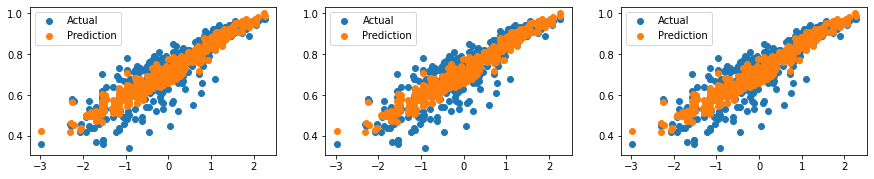



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8171827660479398
Adj_R2 ===> 73.94407634687201
MAE on Training set  ---> 0.04316655298203512
Residual Sum of Squares (RSS) on Training set  ---> 1.450874132090341
Mean Squared Error (MSE) on Training set       ---> 0.003627185330225853
Root Mean Squared Error (RMSE) on Training set ---> 0.06022611833935384

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8305208734305327
Adj_R2 ===> 68.62217150121745
MAE on Testing set  ---> 0.04414761591573528
Residual Sum of Squares (RSS) on Training set  ---> 0.32849986571745904
Mean Squared Error (MSE) on Training set       ---> 0.0032849986571745903
Root Mean Squared Error (RMSE) on Training set ---> 0.05731490780917814

--------------------Residual Plots--------------------


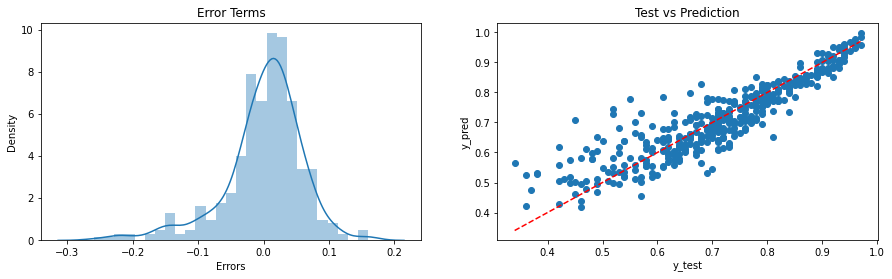

In [ ]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Linear Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Linear Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Coeffecient of the Ridge Regresion Model was found to be  [ 0.01771828  0.01898797  0.00575864 -0.00079625  0.0176618   0.07264487
  0.01331372]
The Intercept of the Ridge Regresion Model was found to be  0.716


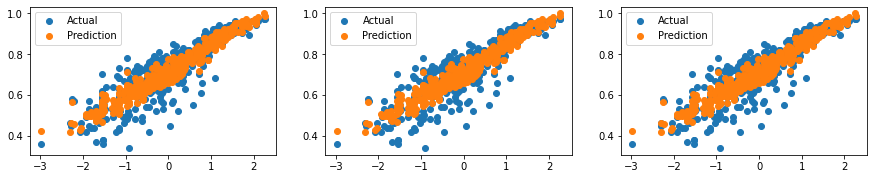



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8171772878426357
Adj_R2 ===> 73.94626215078837
MAE on Training set  ---> 0.04317076604930236
Residual Sum of Squares (RSS) on Training set  ---> 1.450917608223275
Mean Squared Error (MSE) on Training set       ---> 0.0036272940205581876
Root Mean Squared Error (RMSE) on Training set ---> 0.060227020684724124

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8308775368939225
Adj_R2 ===> 68.47986277932492
MAE on Testing set  ---> 0.04405304037643295
Residual Sum of Squares (RSS) on Training set  ---> 0.32780854813634186
Mean Squared Error (MSE) on Training set       ---> 0.0032780854813634188
Root Mean Squared Error (RMSE) on Training set ---> 0.05725456734063596

--------------------Residual Plots--------------------


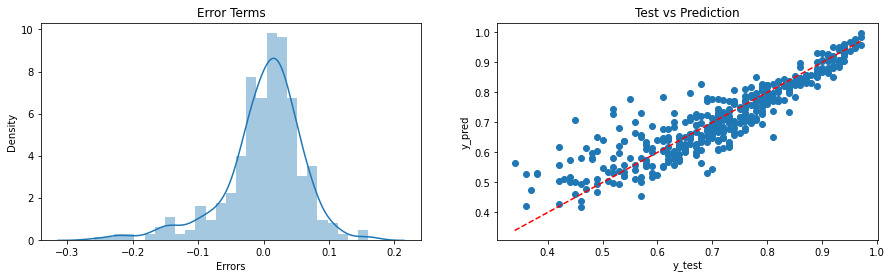

In [ ]:
#Ridge Regression model
RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Ridge Regresion Model was found to be ',RLR.coef_)
print('The Intercept of the Ridge Regresion Model was found to be ',RLR.intercept_)

Evaluate(1, pred1, pred2)

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Lasso Regresion Model was found to be  [0. 0. 0. 0. 0. 0. 0.]
The Intercept of the Lasso Regresion Model was found to be  0.716


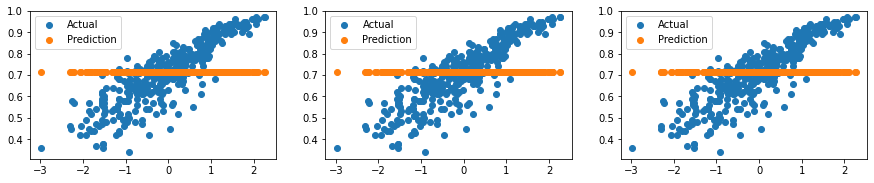



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.0
Adj_R2 ===> 400.0
MAE on Training set  ---> 0.11343
Residual Sum of Squares (RSS) on Training set  ---> 7.9362
Mean Squared Error (MSE) on Training set       ---> 0.0198405
Root Mean Squared Error (RMSE) on Training set ---> 0.14085630976282176

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -0.0424956830527512
Adj_R2 ===> 416.95577753804776
MAE on Testing set  ---> 0.11690000000000002
Residual Sum of Squares (RSS) on Training set  ---> 2.02066
Mean Squared Error (MSE) on Training set       ---> 0.020206599999999998
Root Mean Squared Error (RMSE) on Training set ---> 0.14214992085822628

--------------------Residual Plots--------------------


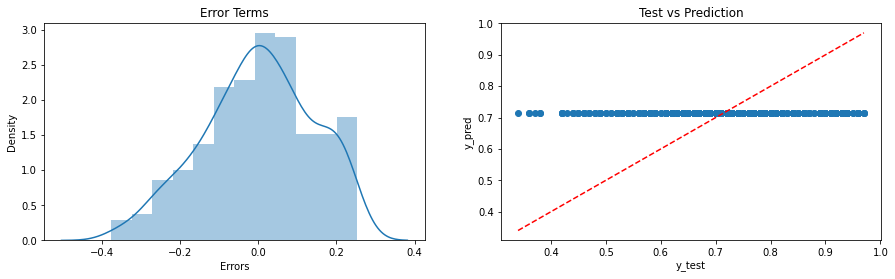

In [ ]:
#Lasso Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Lasso Regresion Model was found to be ',LLR.coef_)
print('The Intercept of the Lasso Regresion Model was found to be ',LLR.intercept_)

Evaluate(2, pred1, pred2)

In [ ]:
# Regression Models Results Evaluation
EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)']
EMC

,Train-R2,Test-R2,Train-Adj_R2,Test-Adj_R2,Train_MAE,Test_MAE,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.817183,0.830521,73.944076,68.622172,0.043167,0.044148,1.450874,0.328500,0.003627,0.003285,0.060226,0.057315
Ridge Linear Regression (RLR),0.817177,0.830878,73.946262,68.479863,0.043171,0.044053,1.450918,0.327809,0.003627,0.003278,0.060227,0.057255
Lasso Linear Regression (LLR),0.000000,-0.042496,400.000000,416.955778,0.113430,0.116900,7.936200,2.020660,0.019841,0.020207,0.140856,0.142150


**Inference:** 

The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable.Also, the model should have close proximity with the training & testing scores. For this problem, it is clear that Ridge linear regressions clearly overfitting the current problem.